## Student Number: 22156658



## PHAS0029 Final Assignment, The Infinite "Unsquare" Potential

In this notebook, known boundary condtions will be utilised in solving differential equations. The main aim of the tasks performed below is to numerically solve the quantum\-mechanical problem of a particle \(electron\) in potential well. The solutions will be energy values \(eigenenergies\) for the corresponding state. The equation to be solved is the one\-dimensional time\-independent Schrödinger equation:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)   \ \ \ [4]
$$

This equation will be solved in different cases of potential wells.  
(As defined by $ V(x) $)

The particle in the potential well is an electron, a fundamental particle with a small mass and charge of \-e \(elementary charge\).   

<u>**Objectives:**</u>

The first objective will be to solve the equation in the case of the infinite square well, where $V(x)$ takes the form: 

$$
V_x = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\ 
\infty  & \text{if } |x| > a, \end{cases}
$$

In this case, in the range \-a to \+a, the potential is 0, and elsewhere it is infinite. It can be shown that the probability of finding a particle with infinite potential is zero. Therefore solving this case requires the boundary that the wavefunction, $\psi =0$ at $x=-a$ and $x = +a$. In this case there are easily determined analytical solutions that can compared both numerically and graphically with the found solutions.

The next objectives will be to test the numerical approach at higher orders, and then to extend it into 3 dimensions. Finally, two different cases finite potentials will be considered and tested with the boundary conditions methods already used in the first part.

<u>**Methods:**</u>

The presence of boundary conditions allows for the use of the secant method, which be outline in detail in the first part. The Numpy Matplot Python modules will be used in calculating solutions and comparing results.

<u>**Functionality:**</u>

Please be aware that this notebook operates in a chronological order, such that if one part of code is changed, it is necessary to restart the kernel and run all cells to. This is due to the usage of reusing common variable names for different tasks.



Note:   
Referencing will be done using square brackets \(e.g. \[1\], \[2\]\). An appendix of references can be found at the end of the notebook.


## 3: A Quantum Dot in a vacuum

<span style='font-size:medium'>The first step of this task is to define physical constants which will be used in solving the Schrodinger equation, they will be saved to variables and will include a high level of precision. When performing calculations, SI unit will be used throughtout.</span>

<span style='font-size:medium'>However, when energy is quoted in comments/text cell</span>  
<span style='font-size:medium'>it will be done so in the units of electronvolts \(eV\). For this reason I will also make two simple conversion functions for ease during the notebook.</span>


In [3]:
#Defining physical constants

#Electron mass/ m (kg):
m = 9.109383702e-31
#Reduced Planck constant, hbar (J/s):
hbar = 1.054571817e-34

#Electron charge, e (C):
e = 1.602176634e-19

#Display constant
print("PHYSICAL CONSTANTS DOCKET")  
print("----------------------------------------------------")
print(f" Electron mass = {e} kg   [1] \n Reduced Planck constant = {hbar} J/s  [1] \n Electron charge = {e} C   [1]")

PHYSICAL CONSTANTS DOCKET
----------------------------------------------------
 Electron mass = 1.602176634e-19 kg   [1] 
 Reduced Planck constant = 1.054571817e-34 J/s  [1] 
 Electron charge = 1.602176634e-19 C   [1]


In [4]:
#Creating conversion functions:

def ev(joules):
    """
    Converts units of Joules to electron-volts.
    

    Input:
    - joules = value of joules to be converted
   
    Returns:
    - ev = value of joules converted to electron-volts
    """
    #Convert
    ev = joules/e
    
    return ev

def joules(ev):
    """
    Converts units of electron-volts to Joules.
    
    Input:
    - ev = value of joules converted to electron-volts
   
    Returns:
    - joules = value of joules to be converted   
    """
    #Convert
    joules = ev * e 
    
    return joules




### Task 3.1: Finding the ground state energy

In order to solve the infinite square well, it is neccessary to define the size of the well (quantum dot) and create a function reperesenting the potential. 
 The wavefunction $ \psi(x) $ only has a non-zero probability density in the region of zero potential, therfore the potential must be 0 for all points of $x$ condsidered.

In [5]:
#Quantum dot parameters:

#Side length, d (m):
d = 5e-9
a = d/2
#Number of points, N:
N = 2000


In [6]:
#Creating a function which returns potential of zero for all x points.

def V(x):
    """
    Returns value of potential for any given x points. The potenitial is zero for all points of x.
    
    Input:
    - x = x data point
    
    Return:
    0.0 
    """
    return 0.0

The Schrödinger equation can be seperated into two first order equations as such:

$$
\frac{d \psi}{dx } = \phi, \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),
$$

In order to solve these two equations simultaneously, the known boundary conditions can be used in conjucture with the Runge-Kutta method.


In [7]:
#Import modules needed for this task
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Create function that calculates the RHS of ODEs to be solved

def schrodinger(r,x,E):
    """
    Calculates RHS of system of ODEs for Schrodinger equation.
    
    Inputs:
    - r = array containing value of phi then psi
    - x = x datapoint
    - E = value of energy
    
    Returns:
    - array of values for the RHS of seperated Schrödinger equation 
    """
    #Extract phi/psi values from r input array
    psi = r[0]
    phi = r[1]
    
    
    #Calculate RHS differential values from equations   
    fpsi = phi 
    fphi = ( ( (2*m)/(hbar**2) ) ) * (V(x) - E) * psi
    
    #Return array of RHS values
    return np.array([fpsi,fphi])




From the boundary condition, it is known that initially (moving from left to right or right to left)  $\psi$ = 0,  the  **initial guess for** $\boldsymbol{\phi}$  does not matter in this case as the wavefunction will need to be **normalised** once a solution has been found.

In [9]:
#Reusing RungeKutta method from week 7 [2]


def RungeKutta2d(xpoints,E):
    '''
    
    Fourth-order Runge-Kutta that solves two simultaneous equations.
    
    Inputs: 
     - xpoints: array of x values.
    Outputs: 
    - [psipoint]: solutions for psi(x)
    '''
    
    #Define intial condition within function
    r = np.array([0,0.1])
    
    
    psipoints = [] # initialise empty arrays
    phipoints = []
    for x in xpoints: # loops over all tpoints up to (tend-h)
        psipoints.append(r[0])
        phipoints.append(r[1])
        # The following is the same as the 1d version, with x->r
        k1 = h*schrodinger(r,x,E) 
        k2 = h*schrodinger(r+0.5*k1, x+0.5*h,E)
        k3 = h*schrodinger(r+0.5*k2, x+0.5*h,E)
        k4 = h*schrodinger(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # these next two lines calculate for the point at x = xend!
    psipoints.append(r[0])
    phipoints.append(r[1])
    return np.array(psipoints) 

The secant method will now be used to numerically converge on a value of the roots of the function.

The secant method is the extended version of the _Newton-Raphson_ method, whereby the x-intercept of a tangential gradient to the function at a point is used to get closer to the  root of the function, this processs is repeated until the found values converge on the actual value of the root:

$$ x' = x - \Delta x  = x - \frac{f(x)}{f'(x)} \ \ \ [2] $$

The secant method extends on this by taking two points $x_1 / x_2 $ and calculating an approximate gradient at $x_2$:

$$ f'(x) \approx \frac{f(x_2)-f(x_1)}{x_2-x_1} \ \ \ [2] $$   

$$ \therefore \ \ x' = x_2 - f(x_2)\frac{x_2 - x_1}{f(x_2)-f(x_1)} \ \ \ [2] $$

Therfore in order to use the secant meed, two guesses of the root (eigenenergy) must be specifiied before the iteration can begin. The known anaylitcal solution for the infinite square well can be used to provide a guess to test our method for the lowest order case: ($ n = 1,2,3...$)

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2} = \frac{\pi^2 \hbar^2 (1)^2}{2m (2a)^2} \approx 0.015 eV   \ \ \ [4]
$$



In [10]:
#Create x start and end points
xstart = -a
xend = +a
#Step size:
h = (xend-xstart)/N
#array of x points to iterate over:
xpoints = np.arange(xstart,xend,h)

#Initial guesses of root/eigenenergy
E1 = 0
E2 = joules(0.02) #0.02eV

#Define tolerance [1]
tolerance = e/100000



#Create secant method inside of function to create more compact code when testing.
def eigenenergy(E1,E2,tolerance):
    """
    Use secant method to converge on nth eigenenergy specified by intial guesses, calls RungeKutta function to calculate next value.
    
    Inptuts:
    - E1/E2 = Initial guesses of energy (J)
    - tolerance = tolerance used in secant method
    
    Returns:
    Prints full value of eigenergy found. 
    """
    #Print initial guesses
    print(f"Calculating eigenergy based on initial guesses: E1 = {E1} eV, E2 = {ev(E2)} eV ....")
   
    #Use secant to converge on correct energy that gives us psi = 0 at +d/2
    while abs(E2-E1) > tolerance:  #loops until tolerance reached
        sol1 = RungeKutta2d(xpoints,E1)[-1]
        sol2 = RungeKutta2d(xpoints,E2)[-1]

        Eout = E2 - sol2*(E2-E1)/(sol2-sol1)
        
        #Update values for next iteraion
        E1 = E2
        E2 = Eout
        
        #Print whether tolerance has/hasnt been reached
        print("...difference between E1,E2 is",abs(E2-E1), "\tCondition met?", abs(E2-E1) < tolerance)
        sol1 = RungeKutta2d(xpoints,E1)[-1]
        sol2 = RungeKutta2d(xpoints,E2)[-1]

    #Print final result with eV conversion    
    print("Calculation complete:")
    print("E = ", ev(Eout), "eV")
       

        
#Call secant function to find ground state energy:        
eigenenergy(E1,E2,e/100000)


Calculating eigenergy based on initial guesses: E1 = 0 eV, E2 = 0.02 eV ....


...difference between E1,E2 is 3.629189174426417e-22 	Condition met? False


...difference between E1,E2 is 5.714104862893877e-22 	Condition met? False
...difference between E1,E2 is 1.5969697731209446e-22 	Condition met? False


...difference between E1,E2 is 1.9009497756524563e-23 	Condition met? False
...difference between E1,E2 is 8.496243287639427e-25 	Condition met? True


Calculation complete:
E =  0.015041173790422264 eV


This appears to work as expected as the calculation converges to a value which satisfies our tolerance condition. The final result has been converted to eV. Next I will find the error on the value when compared to the theoretical value from above.  



In [11]:
#Create function that calculates the nth state's eigenenergy theoretical value:

def analytic(n):
    """
    Calculates analytical value of the eigenenergy for the infinite square well Schrodinger equation.
    
    Inputs:
    - n = order 
    
    Returns:
    - En = calculated eigenenergy
    
    
    """   
    #Compute equation of eigenenegy
    En = ( (np.pi**2)*(hbar**2)*((n)**2)  )/( 2*m*(d**2) )
    
    return En
    
#Test function:
print(f"Analytic value of 1st order energy = {ev(analytic(1))} eV")


Analytic value of 1st order energy = 0.015041206485411837 eV


In [12]:
#Find error between results

def errorbetween(expected,observed):
    """
    Caclulates the percentage error between the expected and observed values to 2 decimal places.
    
    Inputs:
    - expected/observed = expected and observed values
    
    Returns:
    Prints percentage difference.
    """
    #Calculation
    percentdiff = abs((observed-expected)/expected)*100
    
    #Print results
    print(f"Percentage difference between values is: {percentdiff:.2f}%")

#Save secant/analytic soltions to variables    
secant_solution = 0.015041173790422264
analytical_solution = ev(analytic(1))


#Calculate and print error
errorbetween(analytical_solution,secant_solution)



Percentage difference between values is: 0.00%


<span style='font-size:medium'><u>**Conclusion:**</u></span>

<span style='font-size:medium'>There is a 0% error between the secant method and the theoretical value, this result shows that the secant method has been succesful in producing a valid energy value. </span>  



<span style='font-size:x-large'>Task  3.2: Ground state wavefunctions</span>


Now that the ground state energy has been determined, the wavefunction can be constructed. However, as previously mentioned the initial guess for $\phi$ being arbitrary meant that the wavefunction calculated thus far is not normalised.

The normalisation condtion for the wavefunction, $\psi(x)$ is:

$$
\int_{-\infty}^{\infty} | \psi(x) |^2 {\rm d} x = 1 \ \ \ [4]
$$

The normalisation can be done using the trapezoidal rule to calculate the value of the integral on the LHS of the above equation, and then dividing the orignial wavefunction by the square root of this value. The trapezoidal rule:

$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +  \sum_{k=1}^{n-1}f(x + kh) \right] \ \ \ [4]
$$ 
Where $I(a,b)$ is the value of the LHS of the normalisaition condition equation.

The normalised wavefunction can be compared to the known normalised wavefunctions of the system given by:
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.
$$

Since the ground state is where n=1, it can be expected that the first equation (n is odd) will match the resulting normalised wavefunction.

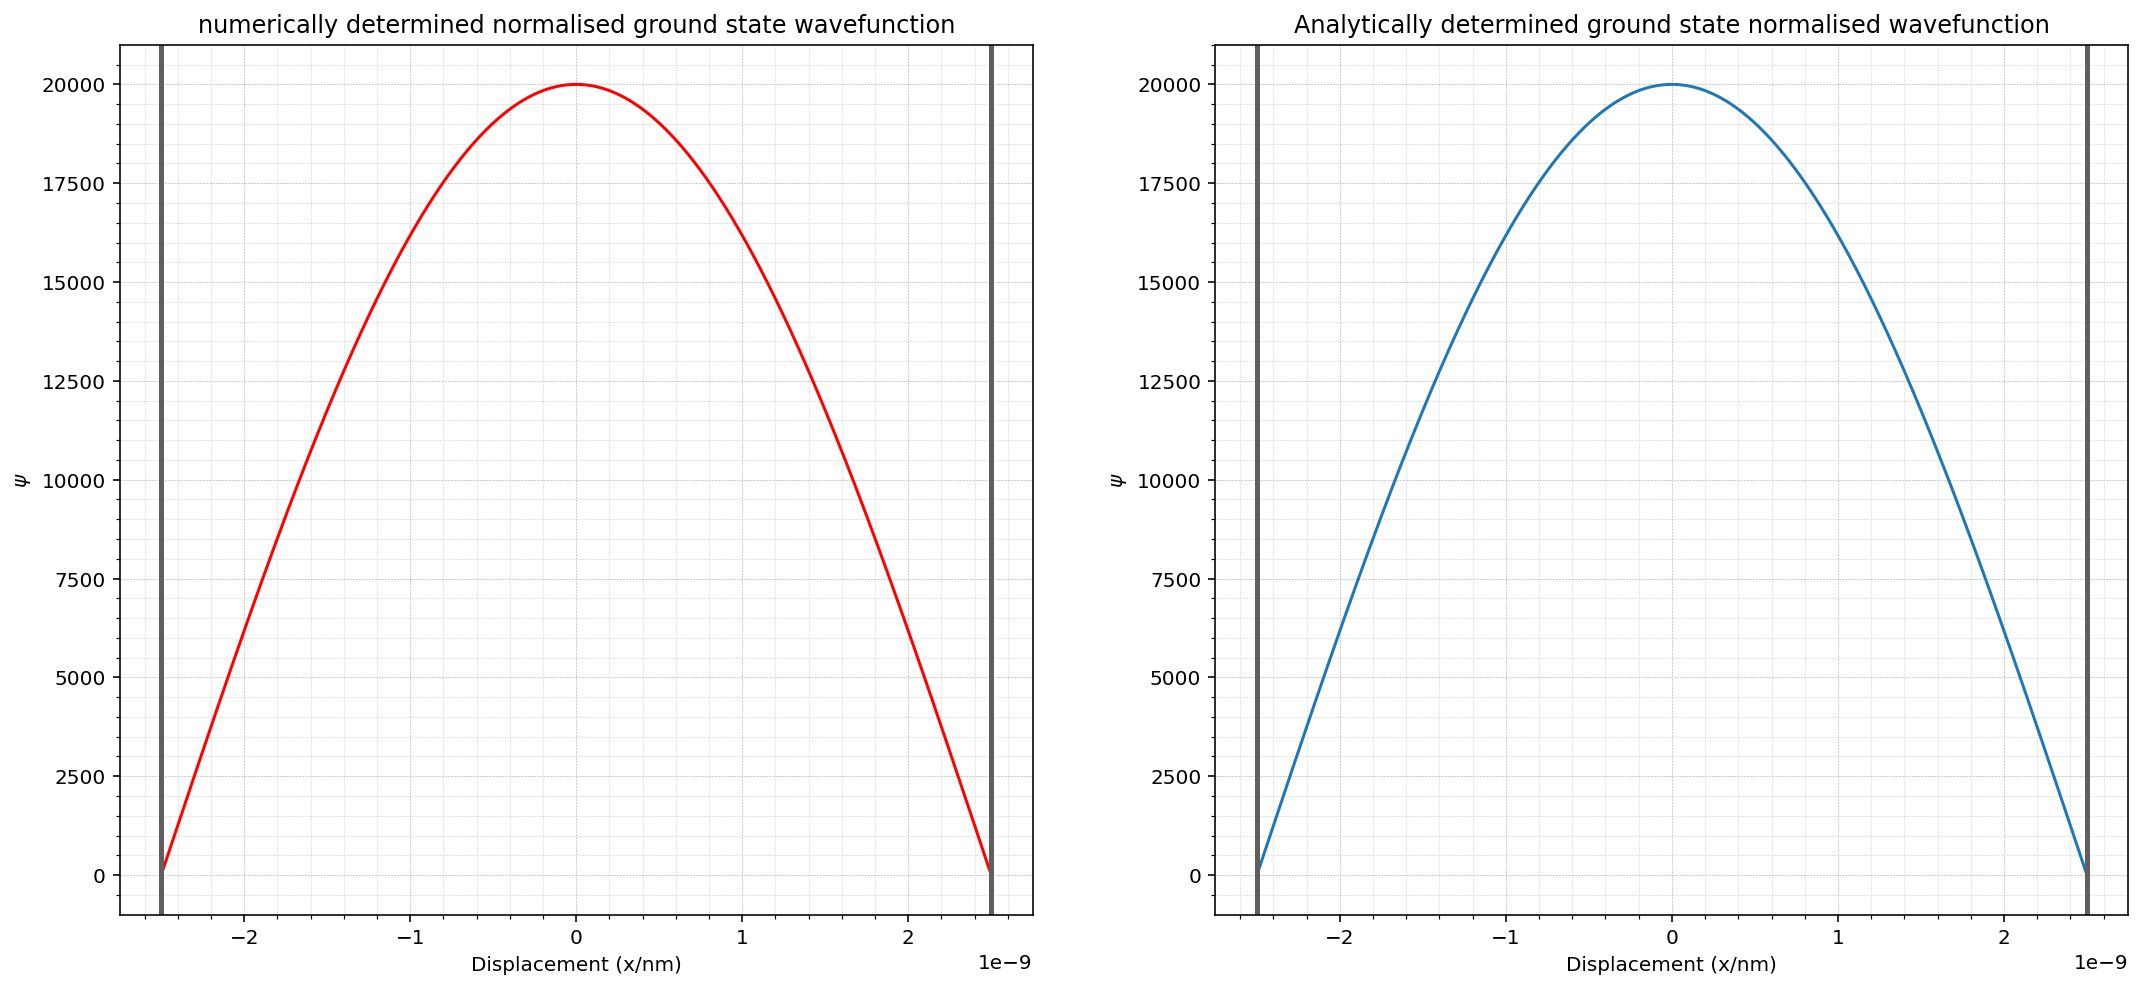

In [13]:
#Create varaible with calculated ground state energy
E_ground =  joules(0.015041173790422264)

#Create array of xpoints 1 longer than xpoints
x = np.arange(-a,a+h,h)

#Create subplot axes
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,8))

#Calculation of normalised wavefunction
psisquared = ( RungeKutta2d(xpoints,E_ground) )**2
psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2]))
normpsi = (RungeKutta2d(xpoints,E_ground))/(np.sqrt(psiinteg))

#Plot normalised wavefunction
ax1.plot(x,normpsi,color='r')
ax1.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
ax1.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
ax1.set_xlabel("Displacement (x/nm)")
ax1.set_ylabel("$\psi$")
ax1.grid(which='both', linestyle='--', linewidth=0.3)
ax1.minorticks_on()
ax1.grid(which='minor', linestyle=':', linewidth=0.3)
ax1.set_title("numerically determined normalised ground state wavefunction")


#Create wavefunction for case where n = odd  
def normpsi_1(x):
    psi_1 = (1/ np.sqrt(a)) * np.cos((1*np.pi*x)/(d))
    return psi_1

#Plot wavefunction n = 1
ax2.plot(x,normpsi_1(x))
ax2.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
ax2.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
ax2.set_xlabel("Displacement (x/nm)")
ax2.set_ylabel("$\psi$")
ax2.grid(which='both', linestyle='--', linewidth=0.3)
ax2.minorticks_on()
ax2.grid(which='minor', linestyle=':', linewidth=0.3)
ax2.set_title("Analytically determined ground state normalised wavefunction");

<u>**Comments:**</u>

It can be seen in the above plots that there is an excellent match between the numerical solution and analytical solutions already known. 


## Task  3.3: Higher order energy states

Now it is important to see if the method works for higher order energies. However, this introduces the issue of obtaining a guess for next order solution without referring to the analytical solution. 

The Schrödinger is an eigenvalue equation:

$$ \hat{H}\psi = E\psi $$

Since this is an eigenvalue problem, there must be a specified set of real eigenvalues (our eigenstates) produced by the Hamiltonian. In our Schrödinger equation, the Hamiltonian does not account for any energy splitting due to spin/orbits/fields and therefore it can reasonably be assumed that the roots which the secant method converege on will correspond to a real nth solution of the eigenvalue equation. Under this assumption there are quantised energy levels, it is reasonably justified to treat these energies as minima on a surface.

Given this knowledge, the method implemented will begin by finding the ground state energy, it can easily be compared to the analytical solution to ensure it's correct. However, in the abscence of an analytical solution, the guesses must be sufficiently low to ensure that no higher energy states are found.

Once the ground the state is found, the method to find the next highest energy is to increase the energy guess by a pre-determined factor. Note that due to the nature of the secant method, speficially becuase the _Newton-Raphson_ method works down the curve, the initial guess can be kept as 0 and as long as the second guess is sufficiently close to the next eigenenergy, the method will converge on the highest possible (next) eigenenergy based on these guesses.

In the situation where, no new energy value is converged on, the factor will be increased so that the guess increases until the discovery of the next eigenvalue (energies). The parameters used will be justified are testing the method in a text cell following the results.


In [14]:
#Method of finding first n energies for infinite square well


#Guesses for initial ground state energy
E1 = 0
E2 = joules(0.02)




#Initialise values for iteration
n = 0
nmax = 5
tolerance = e/100000

#Provide initial guesses
Einc = joules(0.01)
Eprev = 0

#Set initial factor
factor = 1.00 #0% increase
#Create empty array to store found energies
eigenstates = []


while n != nmax: #use while loop until nmax solutions found 
    while abs(E2-E1) > tolerance:
        sol1 = RungeKutta2d(xpoints,E1)[-1]
        sol2 = RungeKutta2d(xpoints,E2)[-1]
        E3 = E2 - sol2*(E2-E1)/(sol2-sol1)
        #Update values for next iteraion
        E1 = E2
        E2 = E3
    
    #If energy found is not the ground state
    if n != 0: 
        #Check if new found energy is the same 
        if abs(E2 - Eprev) < (Einc/2)*factor:
            n += 0
            #Increase factor
            factor += 3 
            #Set new guesses with factored increase
            E1 = 0
            E2 = E2 + Einc*factor
        #If found energy is new
        else: 
            n += 1
            #Store found energy in eigenstates array 
            eigenstates.append(E2)
            #Increase energy 
            E2 += Einc
            Eprev = E3
     #Specific energy for ground state
    elif n == 0:
        n += 1
        eigenstates.append(E2)
        E1 = 0
        E2 += Einc
        Eprev = E3

#Initilaise state counter for displaying results         
state = 0
#While loop that prints numerical/analytical values of the eigenenergies
while state < nmax:
    print(f"n = {state+1}")
    print(" ")
    #Print analytical / numerical values
    print(f"Analytical Eigenenergy for n = {state+1} = {ev(analytic(state+1))} eV")
    print(f"Numerical Eigenenergy for n = {state+1} state = {ev(eigenstates[state])} eV")
    errorbetween(ev(analytic(state+1)),ev(eigenstates[state]))
    print("-------------------------")
    state += 1
    

n = 1
 
Analytical Eigenenergy for n = 1 = 0.015041206485411837 eV
Numerical Eigenenergy for n = 1 state = 0.015041173790422264 eV
Percentage difference between values is: 0.00%
-------------------------
n = 2
 
Analytical Eigenenergy for n = 2 = 0.06016482594164735 eV
Numerical Eigenenergy for n = 2 state = 0.06016482592670083 eV
Percentage difference between values is: 0.00%
-------------------------
n = 3
 
Analytical Eigenenergy for n = 3 = 0.13537085836870655 eV
Numerical Eigenenergy for n = 3 state = 0.13537085815901365 eV
Percentage difference between values is: 0.00%
-------------------------
n = 4
 
Analytical Eigenenergy for n = 4 = 0.2406593037665894 eV
Numerical Eigenenergy for n = 4 state = 0.24065930351583387 eV
Percentage difference between values is: 0.00%
-------------------------
n = 5
 
Analytical Eigenenergy for n = 5 = 0.3760301621352959 eV
Numerical Eigenenergy for n = 5 state = 0.37603016215514606 eV
Percentage difference between values is: 0.00%
----------------

<u>**Comments:**</u>

The method has been very succesful, as can be seen above there is only a slight discrepancy between analytical/numerical values. Initially, a factor of 5 was used but this proved to be to large as some energies would end up being missed. Next I will plot these results and comment on them. 

Then it will be useful to test the method at higher values of n, and then also compare a higher order wavefunction with the known form as done before for the ground state.


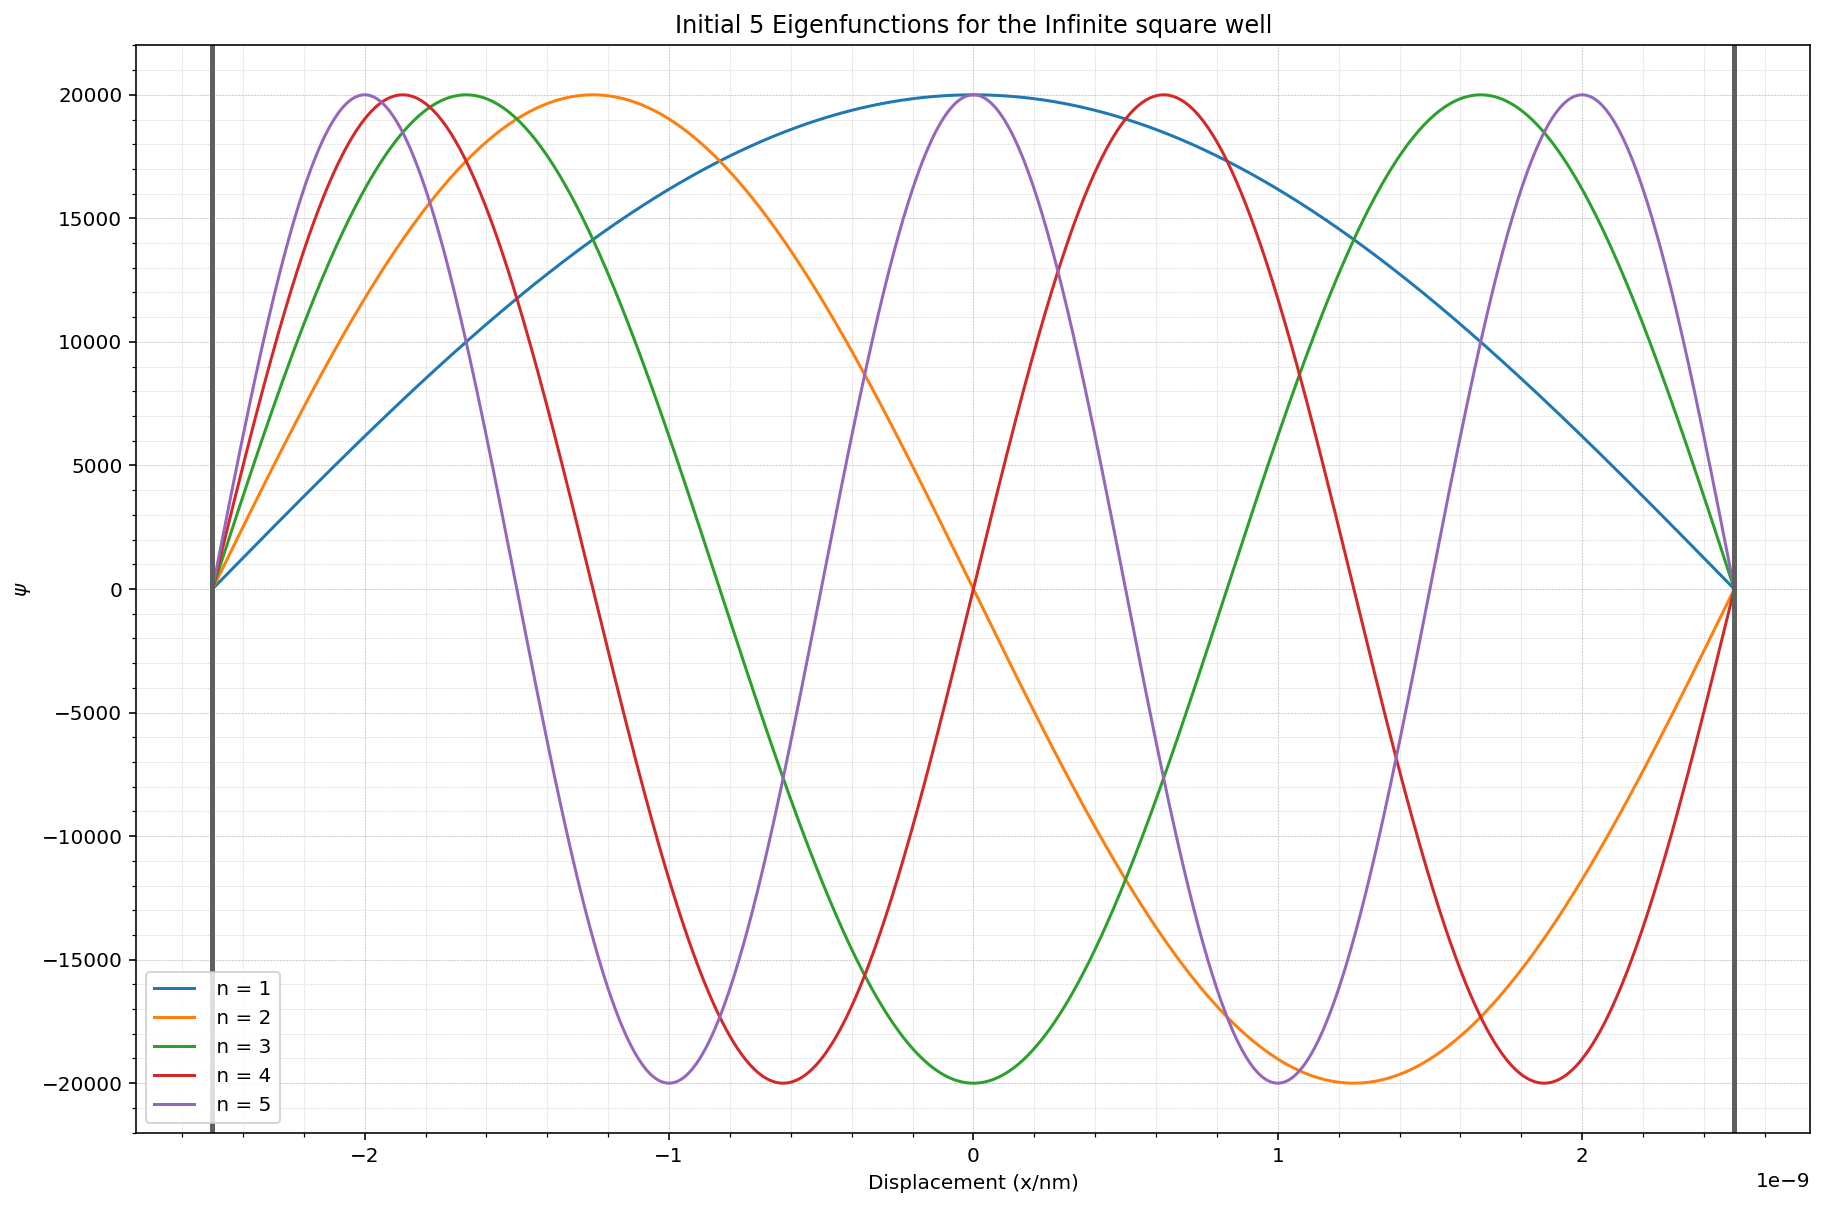

In [15]:
#Create array of x points one longer than xpoints
x = np.arange(-a,a+h,h)

#Create figure with title
plt.figure(figsize=(15,10))
plt.title("Initial 5 Eigenfunctions for the Infinite square well")

#Use for loop to calculate and plot each normalised wavefunction for n = 1,2,3,4,5
for E in eigenstates:
    #Calculate normalised wavefunctions
    psisquared = ( RungeKutta2d(xpoints,E) )**2
    psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2]))
    normpsi = (RungeKutta2d(xpoints,E))/(np.sqrt(psiinteg))
   
    #Plot wavefunction with labels and legend
    plt.plot(x,normpsi,label=(f" n = {eigenstates.index(E) + 1}"))
    plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    plt.grid(which='both', linestyle='--', linewidth=0.3)
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth=0.3)
    
    plt.ylabel("$\psi$")
    plt.xlabel("Displacement (x/nm)")
    
    
    
plt.legend(loc = 3, fontsize = 10)

<u>**Comments:**</u>

The wavefunctions show an expected increase in _nodes_ for each nth order. The ground state has no nodes present except for at the boundaries, each increasing order has one extra node. This explained be explained by the increase in energy of each successive order, we know from $ E = \frac{hc}{\lambda} $ , that as the energy increases, the wavelength is shortened. This decrease in wavelength explains why over the same distance, a higher energy wave will have more nodes than a lower one.


251327413480503.3


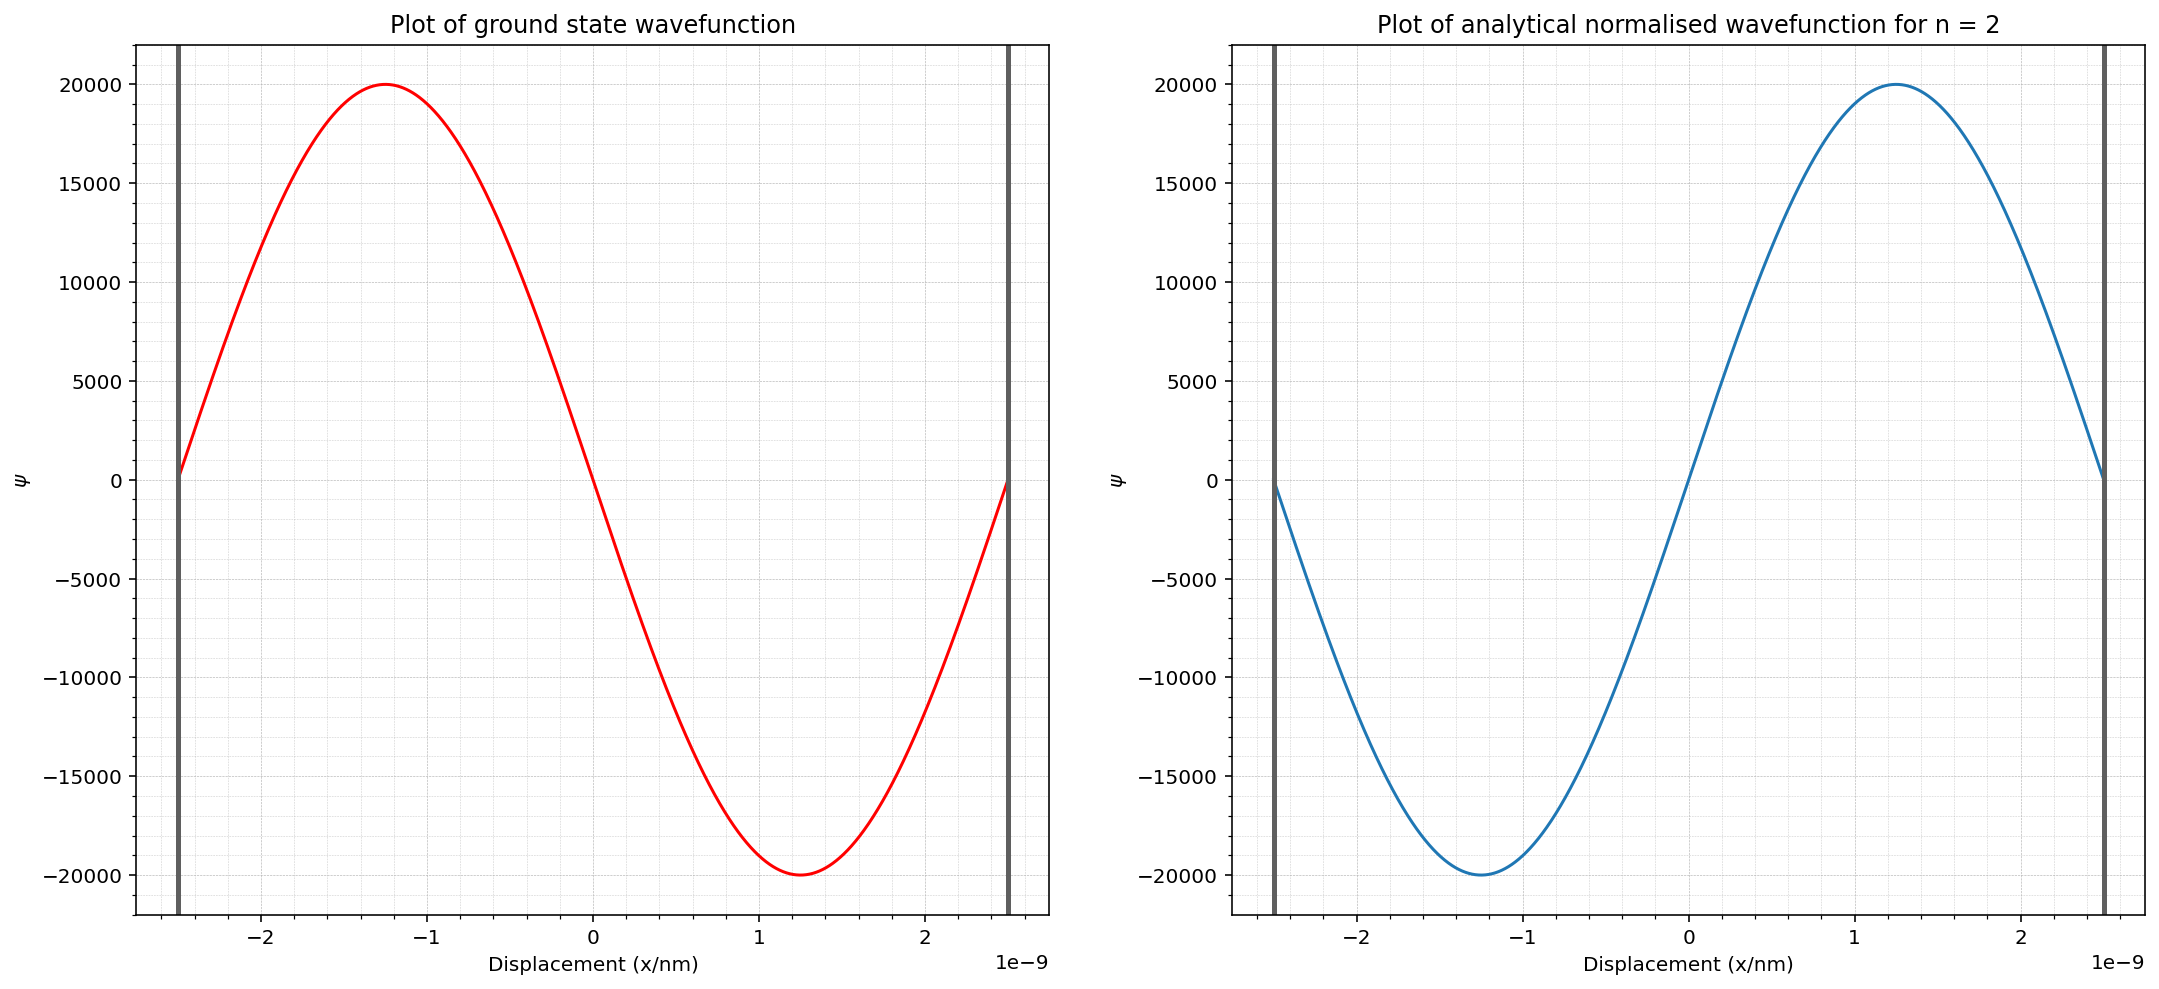

In [16]:
#Create varaible with calculated ground state energy
E_n2 = eigenstates[1]

#Create array of xpoints 1 longer than xpoints
x = np.arange(-a,a+h,h)

#Create subplot axes
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,8))

#Calculation of normalised wavefunction
psisquared = ( RungeKutta2d(xpoints,E_n2) )**2
psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2]))
normpsi = (RungeKutta2d(xpoints,E_n2))/(np.sqrt(psiinteg))

#Plot normalised wavefunction
ax1.plot(x,normpsi,color='r')
ax1.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
ax1.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
ax1.set_xlabel("Displacement (x/nm)")
ax1.set_ylabel("$\psi$")
ax1.grid(which='both', linestyle='--', linewidth=0.3)
ax1.minorticks_on()
ax1.grid(which='minor', linestyle=':', linewidth=0.3)
ax1.set_title("Plot of ground state wavefunction")
print(1/(np.sqrt(psiinteg)))

#Create wavefunction for case where n = even  
def normpsi_1(x):
    psi_1 = (1/ np.sqrt(a)) * np.sin((2*np.pi*x)/(d))
    return psi_1

#Plot wavefunction n = 1
ax2.plot(x,normpsi_1(x))
ax2.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
ax2.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
ax2.set_xlabel("Displacement (x/nm)")
ax2.set_ylabel("$\psi$")
ax2.grid(which='both', linestyle='--', linewidth=0.3)
ax2.minorticks_on()
ax2.grid(which='minor', linestyle=':', linewidth=0.3)
ax2.set_title("Plot of analytical normalised wavefunction for n = 2");

<u>**Comments**</u>

I thought it would be useful to compare the case of n being odd, as in this case the known wavefunction \(right subplot\) shows a sinusodial shape as opposed to the cosine shape in n = even. The left plot clearly shows a perfect match between the known wavefunction and the numerically calculated normalised wavefunction. This result further verifies the accuracy of our model of the infinite potential well Schrödinger equation when solving it numerically.  



<span style='font-size:large'>Testing for large n: </span>


In [17]:
#n = 18

#Find and print numerical value
eigenenergy(0,joules(5),e/100000)

#Find and print analytic value
print(f"Analytic solution at n = 18 is {ev(analytic(18))} eV")

#Print error between results
errorbetween(ev(analytic(18)),4.873350901273436)

Calculating eigenergy based on initial guesses: E1 = 0 eV, E2 = 5.0 eV ....
...difference between E1,E2 is 9.437443982281376e-21 	Condition met? False


...difference between E1,E2 is 4.037196535679412e-20 	Condition met? False
...difference between E1,E2 is 1.2373613127416115e-20 	Condition met? False


...difference between E1,E2 is 1.7491214002569114e-21 	Condition met? False
...difference between E1,E2 is 1.8658294086605367e-23 	Condition met? False


...difference between E1,E2 is 4.3001225870395286e-26 	Condition met? True
Calculation complete:
E =  4.87335095317279 eV
Analytic solution at n = 18 is 4.873350901273436 eV
Percentage difference between values is: 0.00%


In [18]:
#n = 27

#Find and print numerical value
eigenenergy(0,joules(11),e/100000)

#Find and print analytic value
print(f"Analytic solution at n = 27 is {ev(analytic(27))} eV")

#Print error between results
errorbetween(ev(analytic(27)),10.965040118767979)



Calculating eigenergy based on initial guesses: E1 = 0 eV, E2 = 11.0 eV ....
...difference between E1,E2 is 2.7898799023389535e-21 	Condition met? False


...difference between E1,E2 is 2.8309743187695677e-21 	Condition met? False
...difference between E1,E2 is 1.9702338263622955e-23 	Condition met? False


...difference between E1,E2 is 3.860089117796646e-26 	Condition met? True
Calculation complete:
E =  10.965040118767979 eV
Analytic solution at n = 27 is 10.96503952786523 eV
Percentage difference between values is: 0.00%


<u>**Comments:**</u>

Although here I have used the analytical solution to provide an energy guess that allows the secant method to converge on the correct order value, it can clearly be seen that even at higher orders of energy, the method is very accurate and provdies excellent estimations of the theoretically derived analytical solutions.  



<span style='font-size:x-large'>Task  3.4: Extension to 3D</span>  

A qauntum dot must be considered in 3 dimension, in this case, the analytical solutions take the form:

$$
E_{n_x,n_y,n_z} = (n_x^2+n_y^2+n_z^2)\frac{\pi^2 \hbar^2}{2m d^2} \ \ \ [1]
$$

Where the three iterations of n are discrete quantum number representing each dimension of three dimensional euclidean space. The introduction of three dimensions introduces energy degeneracy, since the energy is calculated using the squares of the sums, as listed below, different combinations lead to the same resulting sum of squares. 

List of first ten degenerate prefactors to energy calculation = \($n_x^2+n_y^2+n_z^2$\)

$$  
E_{111} = 3 \\
E_{112} = E_{121} = E_{211} = 6 \\
E_{122} = E_{212} = E_{221} = 9 \\
E_{113} = E_{113} = E_{113} = 11 \\
E_{222} = E_{222} = E_{222} = 12 \\
E_{123} = E_{312} = E_{321} = 14 \\
E_{322} = E_{232} = E_{223} = 17 \\
E_{411} = E_{141} = E_{114} = 18 \\
E_{331} = E_{331} = E_{331} = 19  \\
E_{412} = E_{124} = E_{214} = 21 $$



In [19]:
#Creating function that calculates energies for 3D extension
def analytic3D(nsum):
    """
    Calculates energy for given sum of squares of x/y/z orders in 3D Schrödinger equation.
    
    Inputs:
    - nsum = sum of squares n_x/n_y/n_z
    Returns:
    - E = calculated energy value
    """
    #Calculate energy using formula above
    E =  nsum*((np.pi**2)*(hbar**2) )/( 2*m*(d**2) )
    
    #Return calulated energy
    return E

#Create array of nsum values
sums = [3,6,9,11,12,14,17,18,19,21]

#Use for loop to calculate and print energies
for i in sums:
    print(fr"First degenerate sum  = {i}, the energy is {ev(analytic3D(i))} eV ")

First degenerate sum  = 3, the energy is 0.04512361945623552 eV 
First degenerate sum  = 6, the energy is 0.09024723891247104 eV 
First degenerate sum  = 9, the energy is 0.13537085836870655 eV 
First degenerate sum  = 11, the energy is 0.16545327133953022 eV 
First degenerate sum  = 12, the energy is 0.18049447782494207 eV 
First degenerate sum  = 14, the energy is 0.21057689079576572 eV 
First degenerate sum  = 17, the energy is 0.25570051025200125 eV 
First degenerate sum  = 18, the energy is 0.2707417167374131 eV 
First degenerate sum  = 19, the energy is 0.2857829232228249 eV 
First degenerate sum  = 21, the energy is 0.3158653361936486 eV 


<u>**Comments:**</u>

As expected, the energies increased for larger nsum values. The explanation behind this trend is that higher energy states correspond to increased kinetic energy states of the particles. Kinetic energy is directly proportional to energy through the simple relation:

$$
KE =\frac{p^2}{2m}
$$

Where $p$ is the momentum, directly related to the velocity through the relation $p=mv$, where v is the velocity and m is the mass. 

Hence an increase in velocity corresponds to an increase in kinetic energy, and therefore also an increase in the eigenergy of the particle due to the Hamiltoninan \(energy operator in aforementioned eigenvalue equation\) including a kinetic energy term of said particle.  



Assuming the dot is in a vacuum, we can consider the transition of the dot between energy non\-degenerate energy levels:


$$
E_{112} \rightarrow \ E_{111}
$$

Upon transition from a higher energy to lower energy level, a photon will be emitted. The properties of the emitted light can be tuned, the wavelength of this transition will be calculated to see which part of the electromagnetic spectrum the photon lies in.

\(Speed of light in a vacuum, c = 299 792 458 ms^\-1   \[3\]\)


In [20]:
#Defining constants used in transition calculations
planckconstant = hbar*2*np.pi
speedoflight = 299792458 #ms^-1

#Calculating and printing energy of transition
Etransition = analytic3D(6) - analytic3D(3)
print(f"Energy of transition from E112 to E111 = {ev(Etransition)} eV")

#Calculating and printing frequency, wavelength and wavenumber of transition
Frequency = Etransition/planckconstant
print(f"Frequency of emitted photon transtion = {Frequency} Hz")
wavenumber = (Etransition/(planckconstant*speedoflight)) /100
wavelength = (planckconstant*speedoflight)/Etransition
print(f"wavelength of photon emitted = {wavelength} m")
print(f"wavenumber = {wavenumber} cm^-1")

#E = hf = hc/lambda

Energy of transition from E112 to E111 = 0.04512361945623552 eV
Frequency of emitted photon transtion = 10910842647596.4 Hz
wavelength of photon emitted = 2.7476563239232732e-05 m
wavenumber = 363.9465355594903 cm^-1


<u>**Comments:**</u>

The wavelength of emitted photon is in the order of $10^{-5}$ , this lies in the infrared region of the electromagnetic spectrum. These wavelengths have applications in heating, short range communications and detecting thermal properties.  



## 4: The Infinite "Unsquare" Well.



<span style='font-size:x-large'>Task  4.1: Harmonic potential</span>  

<span style='font-size:medium'>In this section of the notebook, the objective is to find the eigenenergies for the case of the potenital taking different forms than before. The first is the case of the "Harmonic potential", which graphically looks like the following:</span>

<img src=".22156658-C8.ipynb.upload/Harmonic potential.jpg"   width="454.6px"  height="322.6px"  style="object-fit:cover"/>

<span style='font-size:small'>Fig 1. Sketch of harmonic potential inbetween boundaries of well, accesible at: </span>https://imgur.com/a/nsRUwUD<span style='font-size:small'>  \[Original, created by myself\]</span>

<span style='font-size:medium'>The potential inside the well takes the analytical form of:</span>

$$ V(x) = V_{0} \frac{x^2}{a^2} $$



In [21]:
###
p_h = 1
def V_h(x,a=2.5e-9):
    """
    Calculates and returns 1D harmonic potential inside infinite potential well 
    
    Inputs:
    - x = x coordinate inside potential
    
    Outputs:
    - V = potential at given coordinate
    """
    
    #Calculate potential inside well
    V0 = p_h*e
    V = V0 * ( x**2 / a**2 )
    #Return potential
    return V


\*Note that p\_h = 1 seemed to give the best results, depsite the suggestion of a much higher value, the method appears to be much less accurate at that range.  



In [22]:
#Create equation for RHS of ODEs

def schrodinger_h(r,x,E):
    """
    Calculates RHS of system of ODEs for Schrodinger equation.
    
    Inputs:
    - r = array containing value of phi then psi
    - x = x datapoint
    - E = value of energy
    
    Returns:
    Array of values for the RHS of the two ODEs extracted from the Schrödinger equation. 
    """
    #Extract phi/psi values from r input array
    psi = r[0]
    phi = r[1]
    
   
    #Calculate differential values from ODE equations   
    fpsi = phi   
    fphi = ( 2*m / (hbar**2) )*( V_h(x) - E) * psi
  
    #Return array of values
    return np.array([fpsi,fphi])

# Reusing RungeKutta method from week 7 [2]

def RungeKutta2d_h(xpoints,E):
    '''
    Fourth-order Runge-Kutta rewritten for two simultaneous equations
    
    Inputs: 
      - xpoints: array of x values.
    Returns:
     - [psipoint]: solutions for psi(x)
    '''
    
    #Define intial conditions
    r = np.array([0,0.1])
    
    
    psipoints = [] # initialise empty arrays
    phipoints = []
    for x in xpoints: # loops over all tpoints up to (tend-h)
        psipoints.append(r[0])
        phipoints.append(r[1])
        # The following is the same as the 1d version, with x->r
        k1 = h*schrodinger_h(r,x,E) 
        k2 = h*schrodinger_h(r+0.5*k1, x+0.5*h,E)
        k3 = h*schrodinger_h(r+0.5*k2, x+0.5*h,E)
        k4 = h*schrodinger_h(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    #Append point at xend to psipoints
    psipoints.append(r[0])
   
    #Return calculated array of psipoints 
    return np.array(psipoints) 

In [23]:
##Testing for ground state energy


#Define intitial conditions
E1 = 0
E2 = joules(0.02)
tolerance = e/100000
print(f"Calculating eigenergy based on initial guesses: E1 = {E1} eV, E2 = {ev(E2)} eV ....")

#Use secant to converge on correct energy that gives us psi = 0 at +d/2
while abs(E2-E1) > tolerance:
    sol1_h = RungeKutta2d_h(xpoints,E1)[-1]
    sol2_h = RungeKutta2d_h(xpoints,E2)[-1]

    Eout = E2 - sol2_h*(E2-E1)/(sol2_h-sol1_h)
    #Update values for next iteraion
    E1 = E2
    E2 = Eout
       
    print("...difference between E1,E2 is",abs(E2-E1), "\tCondition met?", abs(E2-E1) < tolerance)
    sol1_h = RungeKutta2d_h(xpoints,E1)[N]
    sol2_h = RungeKutta2d_h(xpoints,E2)[N]

    
#Print final result with eV conversion   
print("Calculation complete:")
print("E = ", ev(Eout), "eV")

Calculating eigenergy based on initial guesses: E1 = 0 eV, E2 = 0.02 eV ....


...difference between E1,E2 is

 3.144237128892667e-21 	Condition met? False


...difference between E1,E2 is 2.4452462831899838e-21 	Condition met? False


...difference between E1,E2 is 1.8579586022814866e-21 	Condition met? False


...difference between E1,E2 is 1.1620918904929005e-21 	Condition met? False


...difference between E1,E2 is 5.385553405197499e-22 	Condition met? False
...difference between E1,E2 is 1.4205697583120135e-22 	Condition met? False


...difference between E1,E2 is 1.4689256904547943e-23 	Condition met? False
...difference between E1,E2 is 3.4207822460698127e-25 	Condition met? True


Calculation complete:
E =  0.07807835015734692 eV


Known Analytical solution to harmonic potential:  


$$ E = (n+\frac{1}{2}) \hbar \omega $$

$$ \omega  = \sqrt{\frac{k}{m}} = \sqrt{\frac{2V_{0}}{a^2 m}} $$



In [24]:
#analytical solutions to harmonic potential well
p_h = 1
def analytic_h(n):
    """
    """
    omega = np.sqrt((2*p_h*e)/(a**2 * m))
    
    E = (n+0.5)*hbar*omega
    
    return E

ev(analytic_h(0))

0.07807670189014734

In [25]:
# finding and plotting first 6 excited states

#Guesses for initial ground state energy
E1 = joules(0)
E2 = joules(0.02)




#Initialise values for iteration
n = 0
nmax = 5
tolerance = e/100000

Einc = joules(0.03)
Eprev = 0
factor = 1.00 #0%
eigenstates = []

while n != nmax: #use while loop until nmax solutions found 
    while abs(E2-E1) > tolerance:
        sol1 = RungeKutta2d_h(xpoints,E1)[-1]
        sol2 = RungeKutta2d_h(xpoints,E2)[-1]
        E3 = E2 - sol2*(E2-E1)/(sol2-sol1)
        #Update values for next iteraion
        E1 = E2
        E2 = E3
    
    #If energy found is not the ground state
    if n != 0: 
        #Check if new found energy is the same 
        if abs(E2 - Eprev) < (Einc/2)*factor:
            n += 0
            #Increase factor
            factor += 1.5
            #Set new guesses with factored increase
            E1 = 0
            E2 = E2 + Einc*factor
        #If found energy is new
        else: 
            n += 1
            #Store found energy in eigenstates array 
            eigenstates.append(E2)
            #Increase energy 
            E2 += Einc
            Eprev = E3
     #Specific energy for ground state
    elif n == 0:
        n += 1
        eigenstates.append(E2)
        E1 = 0
        E2 += Einc
        Eprev = E3
            
state = 0

while state < nmax:
    print(f"n = {state}")
    print(" ")
    print(f"Analytical Eigenenergy for n= {state} = {ev(analytic_h(state))} eV")
    print(f"Numerical Eigenenergy for n = {state} state = {ev(eigenstates[state])} eV")
    errorbetween(ev(analytic_h(state)),ev(eigenstates[state]))
    print("--------------------------")
    
    state += 1

n = 0
 
Analytical Eigenenergy for n= 0 = 0.07807670189014734 eV
Numerical Eigenenergy for n = 0 state = 0.07807835015734692 eV
Percentage difference between values is: 0.00%
--------------------------
n = 1
 
Analytical Eigenenergy for n= 1 = 0.23423010567044208 eV
Numerical Eigenenergy for n = 1 state = 0.23426858103759912 eV
Percentage difference between values is: 0.02%
--------------------------
n = 2
 
Analytical Eigenenergy for n= 2 = 0.3903835094507367 eV
Numerical Eigenenergy for n = 2 state = 0.3907877409432123 eV
Percentage difference between values is: 0.10%
--------------------------
n = 3
 
Analytical Eigenenergy for n= 3 = 0.5465369132310315 eV
Numerical Eigenenergy for n = 3 state = 0.555793906946483 eV
Percentage difference between values is: 1.69%
--------------------------
n = 4
 
Analytical Eigenenergy for n= 4 = 0.7026903170113261 eV
Numerical Eigenenergy for n = 4 state = 0.713150210546175 eV
Percentage difference between values is: 1.49%
-------------------------

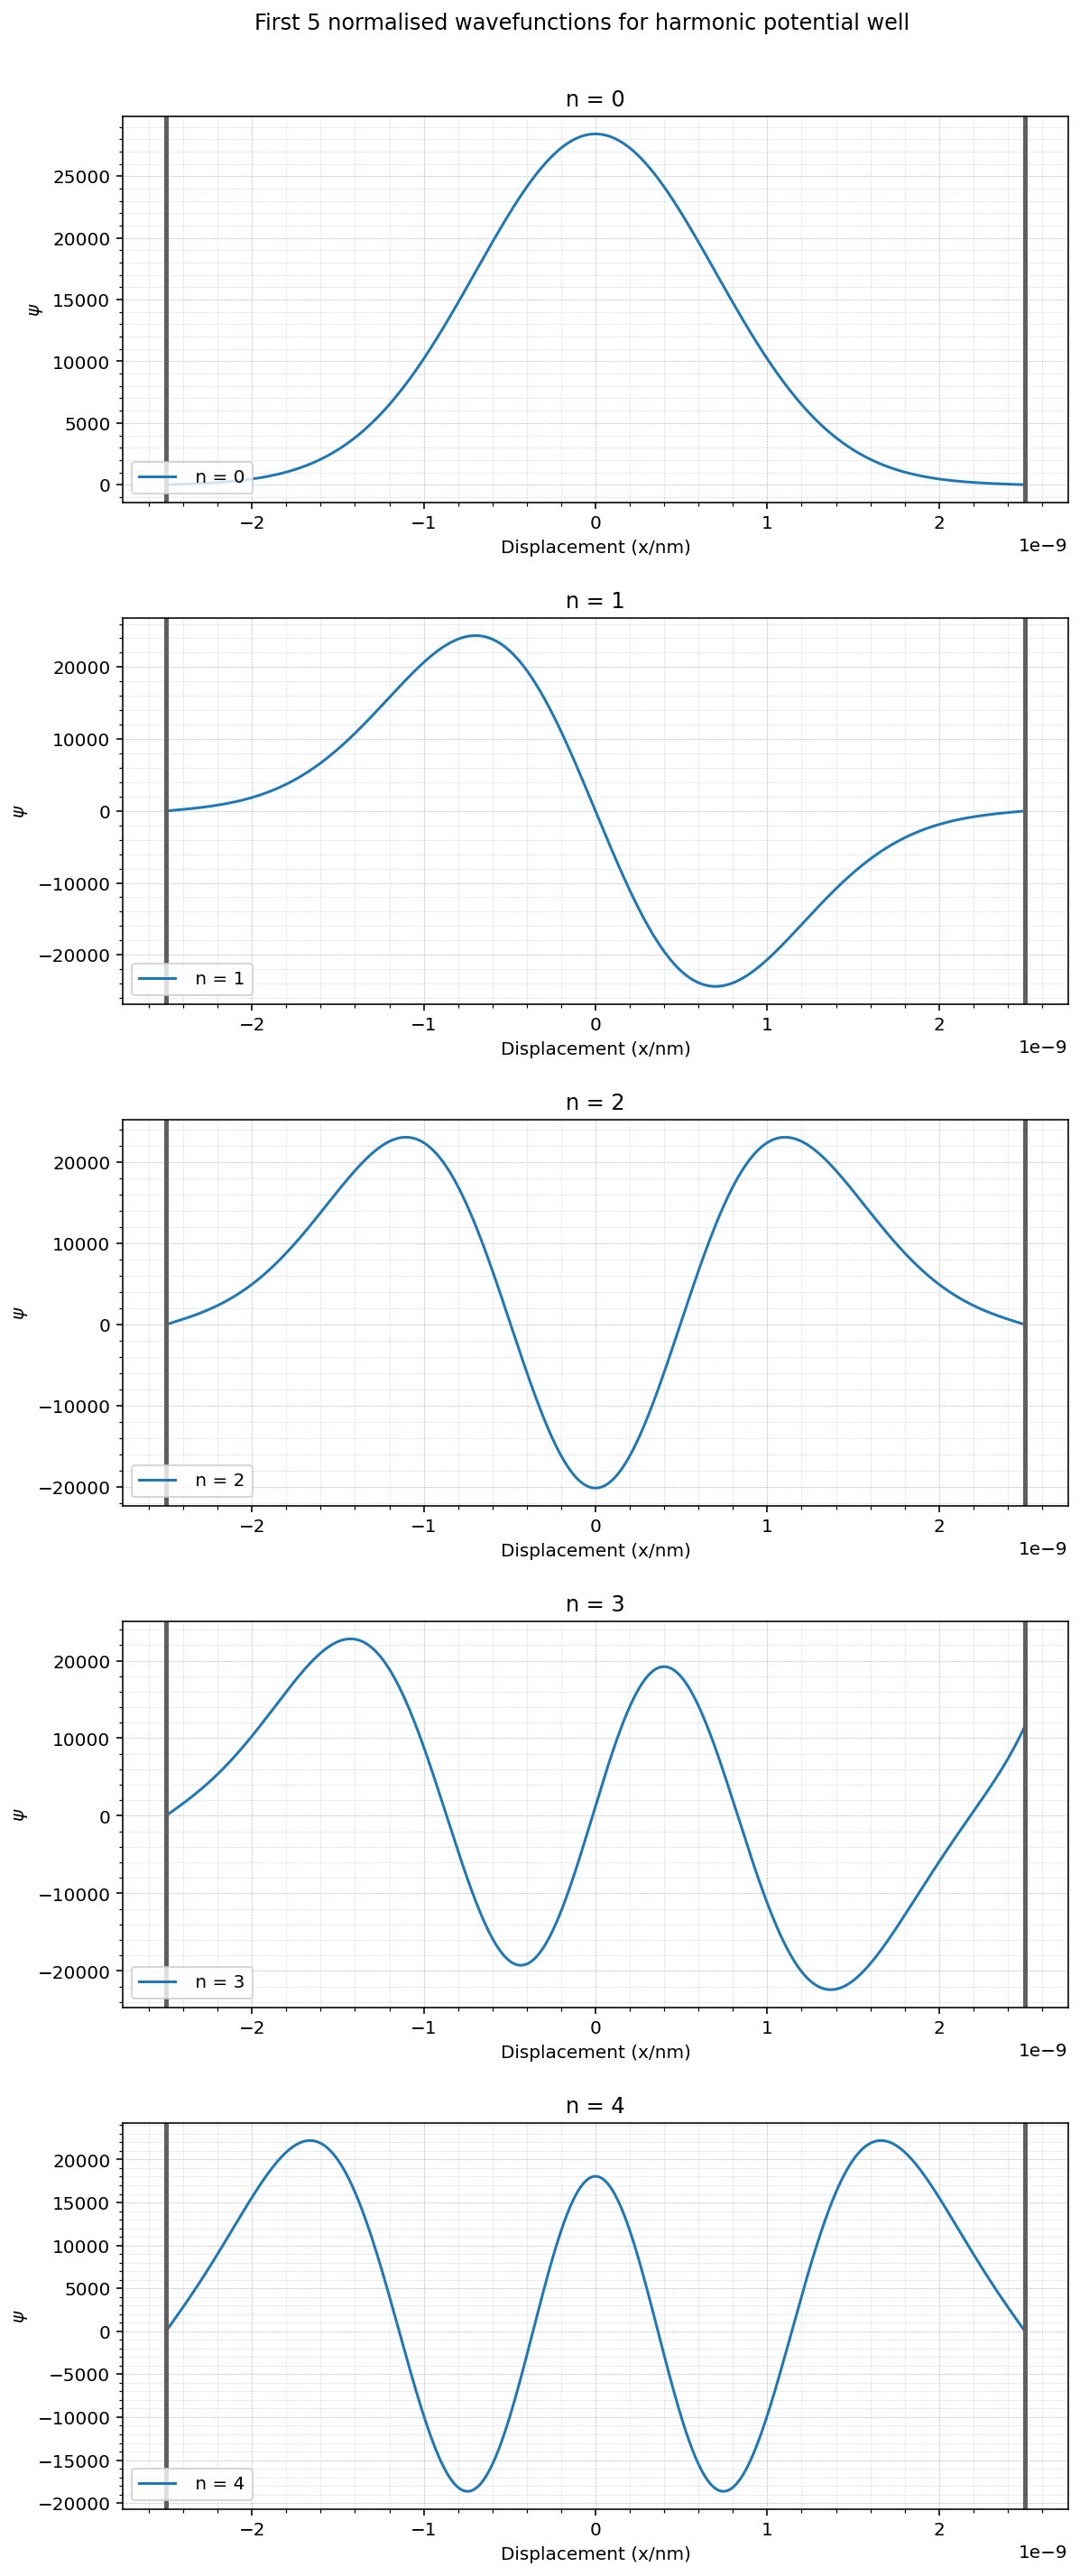

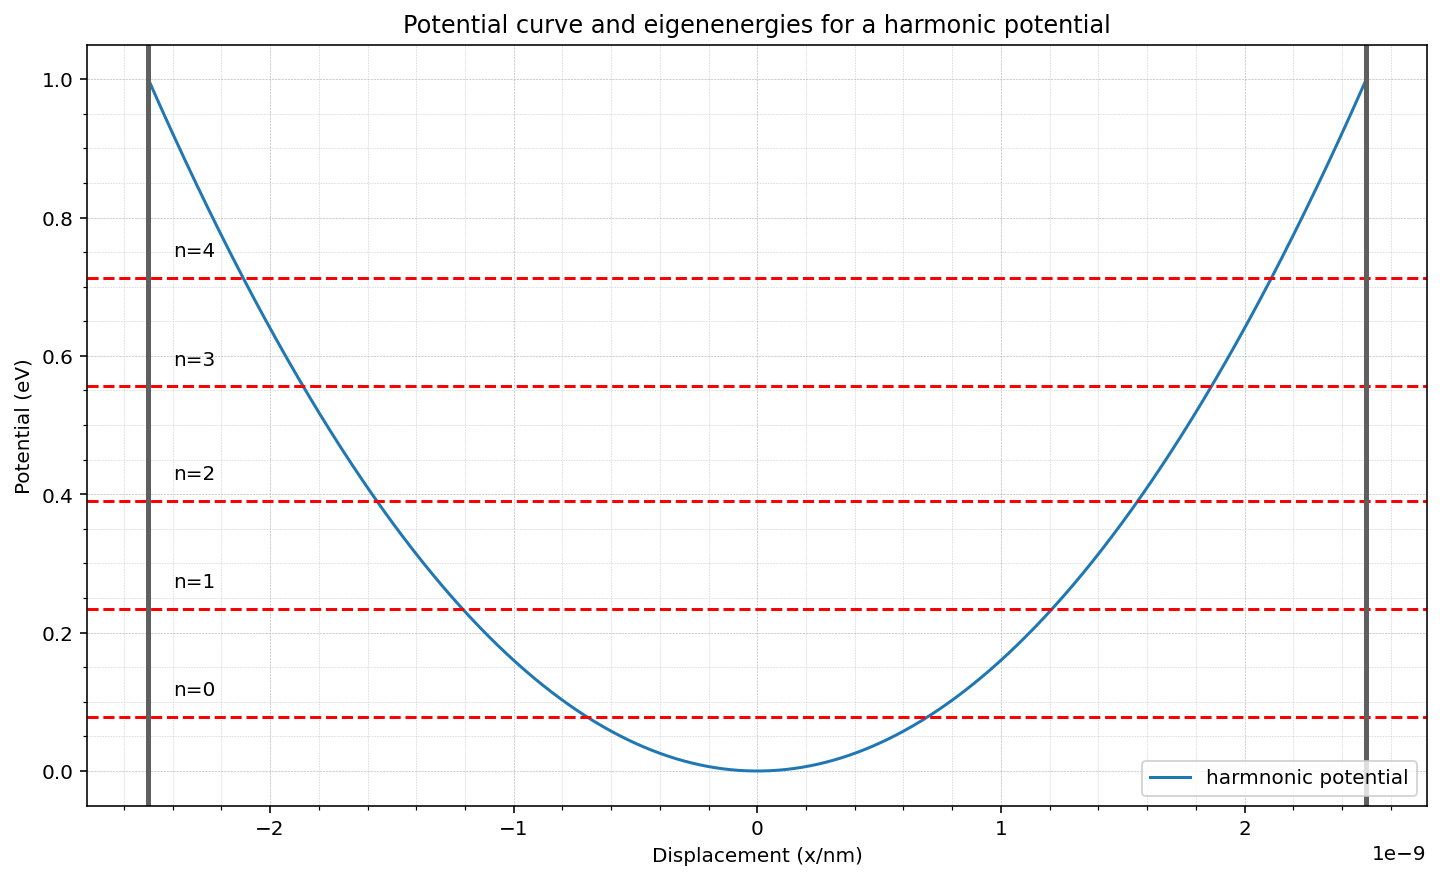

In [26]:
## Calculating and plotting normalised wavefunctions and potential curve with eigenenergies

#Use while loop to 

#Create suplot axes
fig, axlist = plt.subplots(5,1,figsize=(8,20)) 

#Adjust subplot layout for optimal display 
fig.tight_layout()
fig.suptitle("First 5 normalised wavefunctions for harmonic potential well")
fig.subplots_adjust(top=0.94)
fig.subplots_adjust(hspace=0.3)

#Use for loop to calculate and plot normalised wavefunctions on indexed subplot
for E,ax in zip(eigenstates,axlist):
    #Normalise wavefunction
    psisquared = ( RungeKutta2d_h(xpoints,E) )**2 
    psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2]))
    normpsi = (RungeKutta2d_h(xpoints,E))/(np.sqrt(psiinteg))
    #Plot well labelled graph containing wavefunction
    ax.plot(x,normpsi,label=(f" n = {eigenstates.index(E) }"))
    ax.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    ax.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    ax.grid(which='both', linestyle='--', linewidth=0.3)
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth=0.3)
    ax.set_title(f"n = {eigenstates.index(E)}")
    ax.set_ylabel("$\psi$")
    ax.set_xlabel("Displacement (x/nm)")
    ax.legend(loc = 3, fontsize = 10)    

#Create figure for plot of potential curve/eigenvalues
plt.figure()
#Plot potenital curve
plt.plot(xpoints,ev(V_h(xpoints)),label="harmnonic potential")


#Use for loop to plot indivudal energy levels with horizontal line
for i in eigenstates:
    plt.axhline(ev(i), color='r',ls='--')
    plt.text(-2.4e-9,ev(i+0.05e-19),f'n={eigenstates.index(i)}')

#Add titles and key features to graph
plt.title("Potential curve and eigenenergies for a harmonic potential")
plt.xlabel("Displacement (x/nm)")
plt.ylabel("Potential (eV)")
plt.legend(loc=4)
plt.grid(which='both', linestyle='--', linewidth=0.3)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3)
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5);

<u>**Comments:**</u>

When the normalised eigenfunctions are plotted, they are expected to take the form similar to the analytical versions

![](.22156658-C8.ipynb.upload/paste-0.5446477730802608)

Fig 2. Plot of known wavefunctions for harmonic potential, available online at https://imgur.com/a/LetEs3f  \[5\]

It can clearly be seen that for increasing n, the numerically found wavefunctions follow these expected shapes. There is an increase in nodes as the order increases, as discussed previously this is due to the decrease in wavelength corresponding to the increase in energy. The only noticeable difference is the inverse symmetry of the odd wavefunctions. However this is not of major importance as it still implies that the magnitude of oscillations simulated by the numerical solution are correct, but for an unknown reason there is a lack of symmetry between results. This could possibly be due to the antisymmetry of fermions, which an electron is, but as stated this is not of paramount importance.

The potential curve shows plot shows even spacing between the eigenenergies, matching the trend in analytic solutions. It would be interesting to see what happens at higher orders, so this will briefly be attempted to see what behaviour is observed.  



Analytic solution for n = 20 is 3.2011447774960415 eV


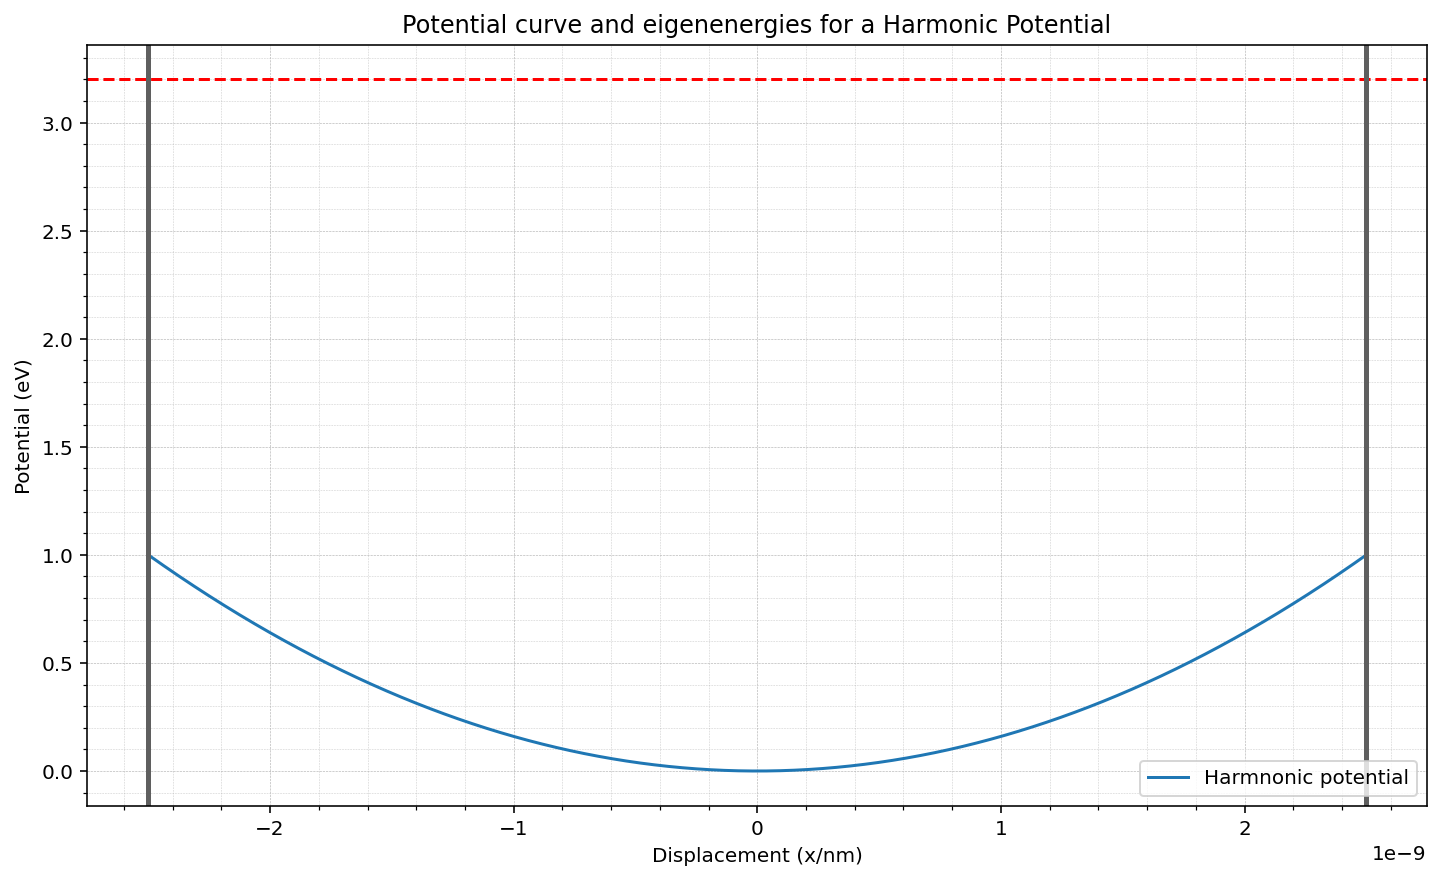

In [27]:
## Testing harmonic potential calculations at n = 20

print(f"Analytic solution for n = 20 is {ev(analytic_h(20))} eV")

#Create figure for plot of potential curve/eigenvalues
plt.figure()

#Plot potenital curve
plt.plot(xpoints,ev(V_h(xpoints)),label="Harmnonic potential")

#Plot n = 20 energy
plt.axhline(3.2011447774960415, color='r',ls='--')


#Add titles and key features to graph
plt.title("Potential curve and eigenenergies for a Harmonic Potential")
plt.xlabel("Displacement (x/nm)")
plt.ylabel("Potential (eV)")
plt.legend(loc=4)
plt.grid(which='both', linestyle='--', linewidth=0.3)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3)
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5);

<u>**Comments:**</u>

Interestingly, the energy is now much greater than the potential curve, implying that the particle is unbound. This represents unphysical behaviour because the potential outside of the well is infinite. This is a paradoxical scenario, the particle is both free from the well and also bound to be inside it.  



<span style='font-size:x-large'>Task  4.2: Finite Square Well</span>  



In the final task for this notebook, the case of the embedded finite square well will be analysed. The boundary conditions of the infinite square well still apply, however now inside the region of non\-infinite potential there is an additional potential well.

The finite square well can be represented mathematically as: 

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases}
$$

Or graphically as shown in the code cell below:



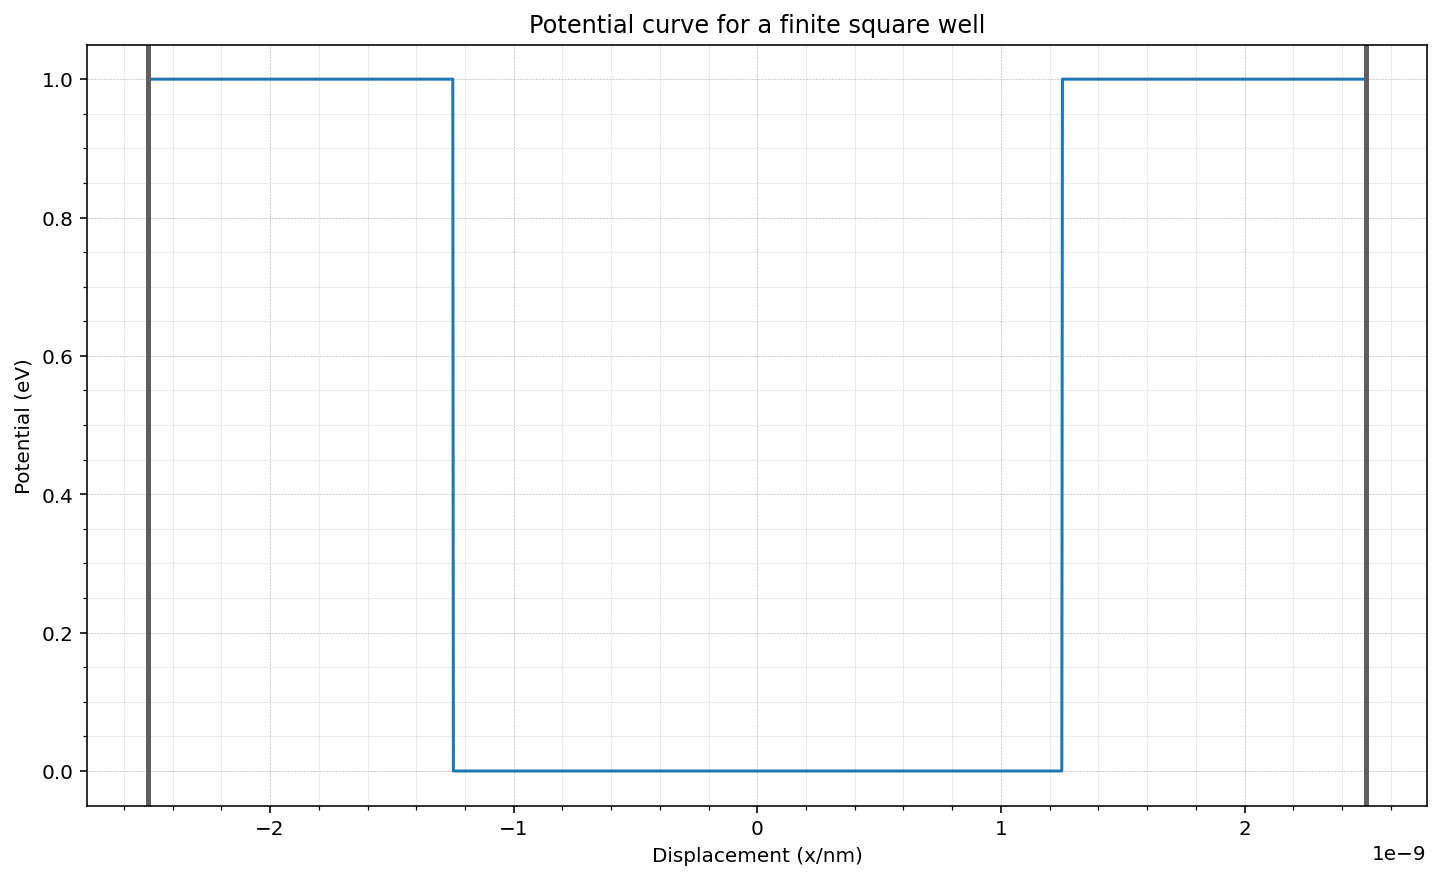

In [28]:
p_h = 1

#Creating function representing finite square potential well
def V_f(x):
    """
    Calculates potential in the 1-dimensional finite square potential well for a given x-coordinate
    
    Inputs:
    - x = x-coordinate
    
    Returns
    Value of potential at given x-coordinate
    """
    
    V = 0
    #If statement representing functions
    if abs(x) <= a/2:
        V = 0
    elif abs(x) > a/2:
        V0 = p_h *e
        V = V0 
    
    #Return potential for given x
    return V

#Create empty array to fill with potential values over xpoints
potential = []

#Fill potential array
for i in xpoints:
    potential.append(ev(V_f(i)))
    
#Plot labelled graph showing form of the potential    
plt.plot(xpoints,potential) 
plt.title("Potential curve for a finite square well")
plt.xlabel("Displacement (x/nm)")
plt.ylabel("Potential (eV)")
plt.grid(which='both', linestyle='--', linewidth=0.3)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3)
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5);

In [29]:
#Create equation for RHS of ODEs

def schrodinger_f(r,x,E):
    """
    Calculates RHS of system of ODEs for Schrodinger equation.
    
    Inputs:
    - r = array containing value of phi then psi
    - x = x datapoint
    - E = value of energy
    
    Returns:
    Array of values for the RHS of equations
    """
    #Extract phi/psi values from r input array
    psi = r[0]
    phi = r[1]
    
   
    #Calculate differential values from ODE equations   
    fpsi = phi   
    fphi = ( 2*m / (hbar**2) )*( V_f(x) - E) * psi
  
    return np.array([fpsi,fphi])

# Reusing RungeKutta method from week 7 [2]

def RungeKutta2d_f(xpoints,E):
    '''
    Fourth-order Runge-Kutta rewritten for two simultaneous equations
  
    Inputs: 
     - xpoints: array of x values.
    Outputs: 
     - [psipoint]: solutions for psi(x)
    '''
    
    #Define intial conditions
    r = np.array([0,0.1])
    
    
    psipoints = [] # initialise empty arrays
    phipoints = []
    for x in xpoints: # loops over all tpoints up to (tend-h)
        psipoints.append(r[0])
        phipoints.append(r[1])
        # The following is the same as the 1d version, with x->r
        k1 = h*schrodinger_f(r,x,E) 
        k2 = h*schrodinger_f(r+0.5*k1, x+0.5*h,E)
        k3 = h*schrodinger_f(r+0.5*k2, x+0.5*h,E)
        k4 = h*schrodinger_f(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    #Store psipoint for the point at x = xend
    psipoints.append(r[0])
    
    #Return final array of psipoints
    return np.array(psipoints) 

In [30]:

#Define intitial conditions
E1 = 0
E2 = joules(0.02)
tolerance = e/100000
print(f"Calculating eigenergy based on initial guesses: E1 = {E1} eV, E2 = {ev(E2)} eV ....")

#Use secant to converge on correct energy that gives us psi = 0 at +d/2
while abs(E2-E1) > tolerance:
    sol1_f = RungeKutta2d_f(xpoints,E1)[-1]
    sol2_f = RungeKutta2d_f(xpoints,E2)[-1]

    Eout = E2 - sol2_f*(E2-E1)/(sol2_f-sol1_f)
    #Update values for next iteraion
    E1 = E2
    E2 = Eout
       
    print("...difference between E1,E2 is",abs(E2-E1), "\tCondition met?", abs(E2-E1) < tolerance)
    sol1_f = RungeKutta2d_f(xpoints,E1)[-1]
    sol2_f = RungeKutta2d_f(xpoints,E2)[-1]

    
#Print final result with eV conversion   
print("Calculation complete:")
print("E = ", ev(Eout), "eV")

Calculating eigenergy based on initial guesses: E1 = 0 eV, E2 = 0.02 eV ....
...difference between E1,E2 is 1.888890333562108e-21 	Condition met? False


...difference between E1,E2 is 1.3207479771626943e-21 	Condition met? False
...difference between E1,E2 is 5.974876296676233e-22 	Condition met? False


...difference between E1,E2 is 1.6649704876532022e-22 	Condition met? False
...difference between E1,E2 is 1.8139254114089142e-23 	Condition met? False


...difference between E1,E2 is 4.67774150935511e-25 	Condition met? True
Calculation complete:
E =  0.04491753988107887 eV


In [0]:
# finding and plotting first 6 excited states

#Guesses for initial ground state energy
E1 = joules(0)
E2 = joules(0.02)

#Initialise values for iteration
n = 0
nmax = 5
tolerance = e/100000

#Set increase value and multiplying factor
Einc = joules(0.02)
Eprev = 0
factor = 1.00 #0% increase first

#Create empty array to store found energies in
eigenstates = []

while n != nmax: #use while loop until nmax solutions found 
    while abs(E2-E1) > tolerance:
        sol1 = RungeKutta2d_f(xpoints,E1)[-1]
        sol2 = RungeKutta2d_f(xpoints,E2)[-1]
        E3 = E2 - sol2*(E2-E1)/(sol2-sol1)
        #Update values for next iteraion
        E1 = E2
        E2 = E3
    
    #If energy found is not the ground state
    if n != 0: 
        #Check if new found energy is the same 
        if abs(E2 - Eprev) < (Einc/2)*factor:
            n += 0
            #Increase factor
            factor += 3 
            #Set new guesses with factored increase
            E1 = 0
            E2 = E2 + Einc*factor
        #If found energy is new
        else: 
            n += 1
            #Store found energy in eigenstates array 
            eigenstates.append(E2)
            #Increase energy 
            E2 += Einc
            Eprev = E3
     #Specific energy for ground state
    elif n == 0:
        n += 1
        eigenstates.append(E2)
        E1 = 0
        E2 += Einc
        Eprev = E3
            
state = 0

while state < nmax:
    print(f"n = {state+1}")
    print(" ")
    
    print(f"Calculated Eigenenergy for n = {state+1} state = {ev(eigenstates[state])} eV")
    
    print("--------------------------")
    state += 1

In [0]:
## Calculating and plotting normalised wavefunctions and potential curve with eigenenergies

#Create empty array to store analytical solutions to energies    
analytics_f = []
nmax = 4
n = 0

#Create suplot axes
fig, axlist = plt.subplots(5,1,figsize=(8,20)) 

#Adjust subplot layout for optimal display 
fig.tight_layout()
fig.suptitle("First 5 normalised wavefunctions for harmonic potential well")
fig.subplots_adjust(top=0.94)
fig.subplots_adjust(hspace=0.3)

#Use for loop to calculate and plot normalised wavefunctions on indexed subplot
for E,ax in zip(eigenstates,axlist):
    #Normalise wavefunction
    psisquared = ( RungeKutta2d_f(xpoints,E) )**2 
    psiinteg= h*(0.5*psisquared[0] + 0.5*psisquared[-1] + np.sum(psisquared[1:-2]))
    normpsi = (RungeKutta2d_f(xpoints,E))/(np.sqrt(psiinteg))
    #Plot well labelled graph containing wavefunction
    ax.plot(x,normpsi,label=(f" n = {eigenstates.index(E)+1}"))
    ax.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    ax.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    ax.grid(which='both', linestyle='--', linewidth=0.3)
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth=0.3)
    ax.set_title(f"n = {eigenstates.index(E)+1}")
    ax.set_ylabel("$\psi$")
    ax.set_xlabel("Displacement (x/nm)")
    ax.legend(loc = 3, fontsize = 10)    

#Create figure for plot of potential curve/eigenvalues
plt.figure()
#Plot potenital curve
plt.plot(xpoints,potential,label="Finite square well potential")


#Use for loop to plot indivudal energy levels with horizontal line
for i in eigenstates:
    plt.axhline(ev(i), color='r',ls='--')
    plt.text(-2.4e-9,ev(i+0.05e-19),f'n={eigenstates.index(i)+1}')

#Add titles and key features to graph
plt.title("Potential curve and eigenenergies for finite square potential well")
plt.xlabel("Displacement (x/nm)")
plt.ylabel("Potential (eV)")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.3)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3)
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5);

<u>**Comments:**</u>

Analytical solutions for the finite square well are somewhat complicated, so to compare the found wavefunctions will some known theoretical results, we can consider the general forms of the solutions for a potential of 0. When V= 0, the particle wavefunction is simple that of the free particle:

$$
\psi=Acos(kx)+Bsin(kx)
$$

Where $k = \sqrt{\frac{2mE}{\hbar^2}}$ and the eigenfunctions where the potential is not 0, but still inside the well take the form: $Ce^{kx}/Ce^{-kx}$ such that they decay, explode as per the boundaries conditions of the infinite square well. 

These solutions take the graphical form:

<img src=".22156658-C8.ipynb.upload/paste-0.29756186977236165"   width="478.8px"  height="272.8px"  style="object-fit:cover"/>

Fig 3. Plots of first 4 eigenfunction for finite square well solutions, available online at: https://imgur.com/a/WfAGtKk  \[6\]

Comparing these plots to the ones produced by the numerical method, there is an outstanding likeness in the shape and magnitude, suggesting that the method has produced results close to the unknown analytical solutions. However for n = 5, there is an observed linear decay towards the boundaries of the well, which does not match the expect sharp exponential decay. In conjuncture, the eigenergy appears to lie almost perfeclty on the maximum of the potential in the last plot, again suggesting a sharp exponential decline as opposed to a linear one. This abnormal result cannot be compared against the the general solution as the plots only include up to the 4th order.

The plot of the potential shows that for increasing orders, there is an increase in spacing between successive orders. This occurs because at higher energy levels, the particle spends more time in regions where the potential energy is closer to zero, resembling a free particle. Consequently, the difference in energy between adjacent levels becomes larger. This can be attributed to both the quantized nature of energy levels in quantum mechanics and the classical behavior of particles with increasing energy, allowing them to explore larger regions of space within the potential well.


## <u>Final Conclusion:</u>

Throughout this notebook, the secant method of finding the eigenenergies of the Schrödinger for different potential cases has been very successful.

The first section showed that method can accurately calculate the energies. By using the known boundary conditions, the ground state was succesfully found and compared with the known analytical solution. Next, the normalised wavefunction for the ground state was constructed, using the trapezoidal rule to calculate the factor of normalisation for the wavefunction. This step was required as the initial guesses used in finding the energies meant that the wavefunction did not fit the aforementioned normalisation condition. The wavefunction was found to match the theoretical version excellently.

The next task was to develop a method of finding the higher order eigenenergies, and importantly create a way of finding them without using the analytical solution so that the method could be used later on when we didnt have access to these solutions. The method was to first find the ground state energy and then increase the range of the guesses until the next value was converged on. It proved very succesful and with a few minor tweaks such as chaning the factor of increase provided resutls very close to the analytical solutions.

The wavefunctions of these higher order states of the infinite square well were constructed and showed the expected forms.

The task was extended to 3D, the analytical solutions were found for the first 10 degenerate cases. Then the transition between these 3D levels was considered and the emitted photon fell in the infrared region. The uses of such emitted light were discussed, another may be infrared imaging.

The penultimate task was to find the eigenenergies in the Harmonic potential case. The same method from before was re\-implemented and proved succesful when compared against analytical results. The wavefunctions were very accurate when compared to literature. 

Finally, the finite square well was investigated. In this case there are no simple analytical solutions, so found results were compared to general solution for free particles. The resultsing normalised wavefunctions were deemend to be of high accuracy, although some discprencies in precision, in higher order states were discussed in this section. Namingly that the edge of the 5th order wavefunction appeared to maybe show unphysical behaviour.

Overall, this notebook should be easy to follow, with all code commented and structured carefully.

I hope that this investigation has been interesting, and I look forward to recieveing commentary and feedback.  



## Bibliography:

1. "PHAS0029 Final Assignment 2023" \- M.SZUMILO, 27/02/2023, Accessed 03/03/2024
2. "PHAS0029\-C7:  2nd Order ODEs \- Investigating non\-linear pendulums" \- SN:22156658, Accessed 03/3/2024
3. "NIST Special Publication 330: The International System of Units \(SI\)." \- National Institute of Standards and Technology \(NIST\). \(2019\).\[Online\]. Available: https://physics.nist.gov/cuu/pdf/sp330.pdf. Accessed 03/3/24
4. "PHAS0029FinalAssignmentSupplementaryNotebook".\- Dash, L. 2020. \[Online\] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/mod/resource/view.php?id=4766052  Accessed 03/3/2024
5. "Solving Schrödinger equation by meshless methods "\- Scientific Figure on ResearchGate. Available from: [https://www.researchgate.net/figure/Eigenfunctions\\\-for\\\-the\\\-Harmonic\\\-oscillator\\\-potential\\\-The\\\-confinement\\\-potential\\\-is\\\-shown\\\_fig2\\\_304085071](https://www.researchgate.net/figure/Eigenfunctions%5C-for%5C-the%5C-Harmonic%5C-oscillator%5C-potential%5C-The%5C-confinement%5C-potential%5C-is%5C-shown%5C_fig2%5C_304085071) , Accessed 30/03/2024
6. "Section 4: One\-dimensional time\-independent problem" \- R Thorne. A Green. 2023 , Accessed 30/03/2024

